In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set_style('whitegrid')

In [23]:
data = pd.read_csv('sat.csv')

In [3]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [5]:
data.shape

(84, 2)

In [6]:
x1 = data['SAT']

In [7]:
x1

0     1714
1     1664
2     1760
3     1685
4     1693
      ... 
79    1936
80    1810
81    1987
82    1962
83    2050
Name: SAT, Length: 84, dtype: int64

In [8]:
y = data['GPA']

In [9]:
y

0     2.40
1     2.52
2     2.54
3     2.74
4     2.83
      ... 
79    3.71
80    3.71
81    3.73
82    3.76
83    3.81
Name: GPA, Length: 84, dtype: float64

In [10]:
y.shape

(84,)

In [24]:
x1.shape

(84,)

<function matplotlib.pyplot.show(close=None, block=None)>

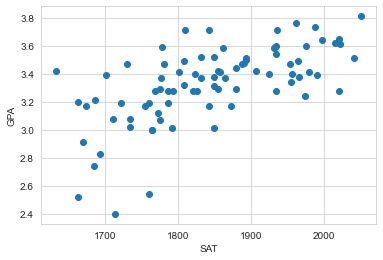

In [26]:
plt.scatter(x1,y)
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show

In [29]:
x = sm.add_constant(x1)

In [30]:
x

,const,SAT
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693
...,...,...
79,1.0,1936
80,1.0,1810
81,1.0,1987
82,1.0,1962


In [14]:
results = sm.OLS(y,x).fit() #ordinary least square, y hamesha pahale lena

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 24 Jul 2021   Prob (F-statistic):           7.20e-11
Time:                        20:21:55   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
test = pd.DataFrame([1600,1500],columns=['SAT'])

In [17]:
test

,SAT
0,1600
1,1500


In [18]:
test = sm.add_constant(test)

In [19]:
test

,const,SAT
0,1.0,1600
1,1.0,1500


In [20]:
results.predict(test)

0    2.924141
1    2.758572
dtype: float64

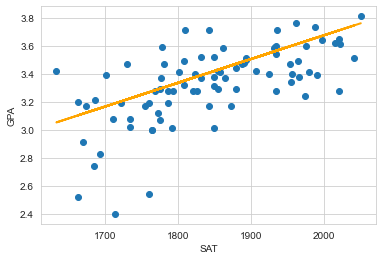

In [21]:
plt.scatter(x1,y)
yhat = 0.275+0.0017*x1
plt.plot(x1,yhat,lw=2,c='orange',label='regression line')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()